In [1]:
import numpy as np
from numpy.random import binomial #hace un generador de numeros aleatorios 
from scipy.stats import binom # implementa la funcion binomial 
from math import factorial 
import matplotlib.pyplot as plt

## Secuencias de eventos tipo Bernoulli

$$
P(k, n; p) = {n \choose k} p^k (1-p)^{n-k} = \frac{n!}{k!(n-k)!}p^k (1-p)^{n-k}
$$

In [2]:
# definición de la distribución binomial 
def my_binomial(k,n,p): #k numero de exitos posibles , n numero de lanzamientos , p numero de posibilidades 
  return factorial(n)/(factorial(k)*factorial(n-k))*pow(p,k)*pow(1-p,n-k)

my_binomial(2,3,0.5) # 3/8

0.375

In [3]:
print('my binomial: {}'.format(my_binomial(2, 3, 0.5)))
dist = binom(3, 0.5)
dist.pmf(2)


my binomial: 0.375


0.3750000000000001

## Validación del ejercicio hecho a mano

$$
P(k\leq 2, n=3, p=1/2) = \sum_{k=0}^2 \left[ \frac{n!}{k!(n-k)!}p^k (1-p)^{n-k} \right] = \frac{7}{8}
$$


In [4]:
print(7/8.0)
dist.cdf(2)

0.875


0.875

## Simulaciones de secuencias con generadores aleatorios

* Los generadores aleatorios tienen como propósito simular muestras de datos que resultarían de muestreos en la vida real de procesos aleatorios como lanzar una moneda o un dado.

La distribución simulada es la fracción de veces que se observa cada posible valor de la variable aleatoria binomial en la lista arr, después de haber realizado un número determinado de ensayos (num_trials) de la simulación. Es decir, representa la distribución empírica obtenida a partir de los resultados de la simulación.

Por otro lado, la distribución teórica es la distribución de probabilidad exacta que sigue la variable aleatoria binomial con los parámetros n=3 y p=0.5. Es decir, es la distribución que se espera teóricamente obtener si se realizaran un número infinito de ensayos bajo las mismas condiciones.

En resumen, la principal diferencia entre ambas distribuciones es que la distribución simulada se obtiene a partir de los resultados de la simulación, mientras que la distribución teórica se obtiene mediante cálculos matemáticos.

In [5]:
# simulación con 100 lanzamientos de moneda equilibrada
# (ejecuta esta celda varias veces para observar la variación en los resultados)
p=.50
n=3
binomial(n, p)
# aqui estamos ejecutando cuantass veces salio cara 

0

In [6]:
# Vamos a hacer un experimento generando una muestra de conjuntos de lanzamientos de a 3 monedas
arr = []
arr.append(binomial(n,p,100))

# aqui estamos agregando al arr cuantas veces salio cara 

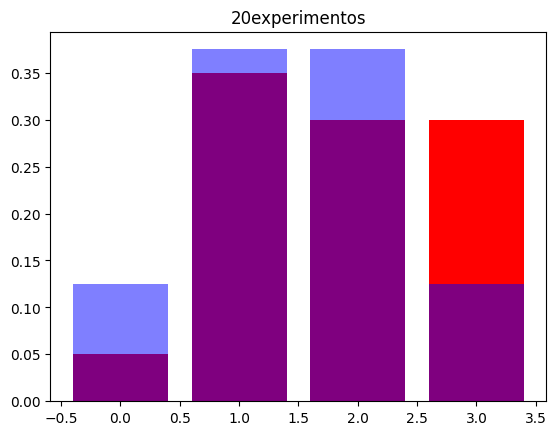

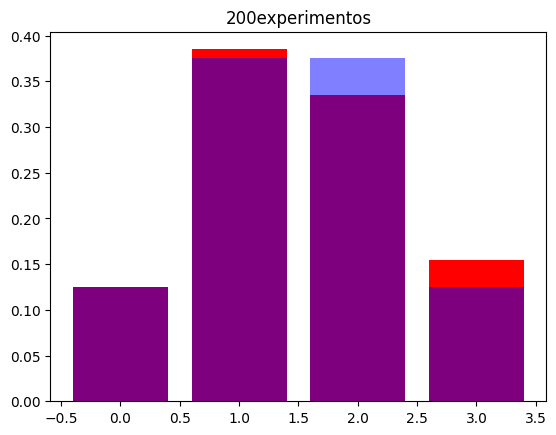

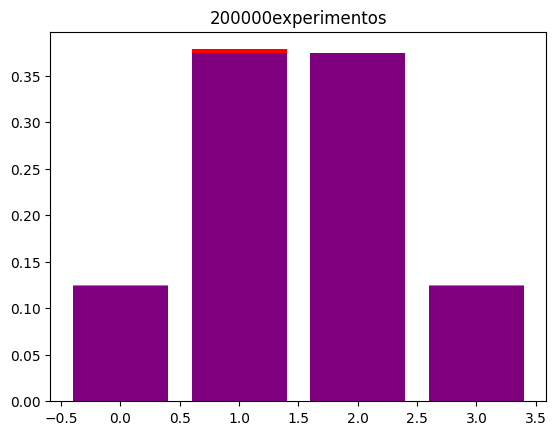

In [7]:
def plot_hist(num_trials): #num trials lo definimos en plot_hist lo que es el numero de veces que quremos que se ejecute 
  values = [0,1,2,3] # solo hay 4 posibles valores que no salga cara 0, que salga 1 vez, 2 o 3 veces 
  arr = [] #una lista vacia
  for _ in range(num_trials): # por cada entero _ en un rango no definido 
    arr.append(binomial(n,p)) # agrega cuantas veces salio cara 
  sim = np.unique(arr,return_counts=True)[1]/len(arr)# unique retorna los valores de 2 arrays 
  # arr retorna cuantas veces salio carra, return_counts retorna las veces que salio un mismo numero de caras 
  # [1]toma el valor de return_counts y lo divide entre la cantidad de numeros que hay en arr para sacar las probabilidades 
  teorica = [binom(3,0.5).pmf(k) for k in values]#usa la formula matematica para saber la probabilidad exacta 
  # 3 n veces , con una probabilidad de 0.5,hara la distribucion binomial(formula) de k posibles exitos 
  # for cada k in los valores 
  plt.bar(values,sim, color = 'r')
  plt.bar(values, teorica , alpha = 0.5, color = 'b')
  plt.title('{}experimentos'.format(num_trials))
  plt.show()
  
plot_hist(20)
plot_hist(200)
plot_hist(200000)